In [31]:
%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("machine-learning"))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
['usps.h5']


Preprocessing and Visualization

In [32]:
import h5py 
from functools import reduce
def hdf5(path, data_key = "data", target_key = "target", flatten = True):
    """
        loads data from hdf5: 
        - hdf5 should have 'train' and 'test' groups 
        - each group should have 'data' and 'target' dataset or spcify the key
        - flatten means to flatten images N * (C * H * W) as N * D array
    """
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [33]:
X_tr, y_tr, X_te, y_te = hdf5("machine-learning/usps.h5")
X_tr.shape, X_te.shape
#I will choose how to split training and test
X_comb=np.append(X_tr,X_te,0)#9298 obs x 256 bits
y_comb=np.append(y_tr,y_te)
nRow= (len(X_comb[:,1]))
nCol= (len(X_comb[1,:]))
numbers = np.unique(y_comb)
print(f'There are {nRow} samples and {nCol} columns in total')
print(f'Numbers are {numbers} ')


There are 9298 samples and 256 columns in total
Numbers are [0 1 2 3 4 5 6 7 8 9] 


For label 0 get 10 random samples
For label 1 get 10 random samples
For label 2 get 10 random samples
For label 3 get 10 random samples
For label 4 get 10 random samples
For label 5 get 10 random samples
For label 6 get 10 random samples
For label 7 get 10 random samples
For label 8 get 10 random samples
For label 9 get 10 random samples
For label 9 no. indexes  644 
For label 9 index  488 will be at position 5052 in array X_comb 


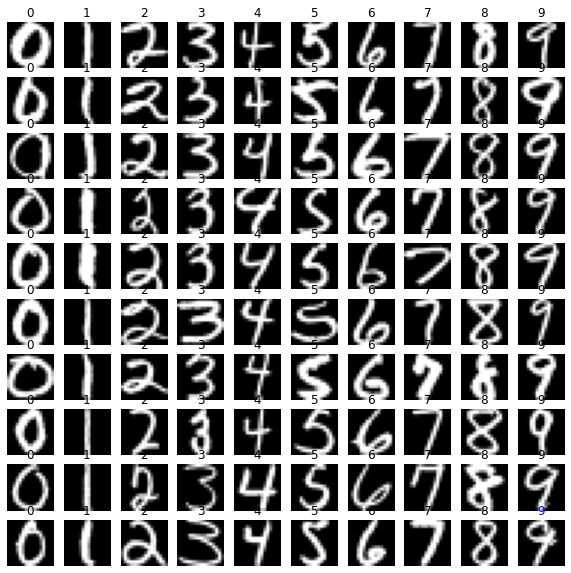

In [94]:
num_samples = 10 #rows to displya

classes = set(y_comb)
num_classes = len(classes)#10
fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):#for the number
    class_idxs = np.where(y_tr == label)#index of the label
    size_indexes_number_label= class_idxs[0].shape[0]
    print(f'For label {label} get {num_samples} random samples')
    for i, idx in enumerate(np.random.randint(0, size_indexes_number_label, num_samples)):#get num_samples i in labels
        ax[i, label].imshow(X_comb[class_idxs[0][idx]].reshape([16, 16]), 'gray')#px.imshow --reshape
        plt.title(label, fontsize=16,color='blue')
        ax[i, label].set_axis_off()
        ax[i, label].set_title(label)
print(f'For label {label} no. indexes  {size_indexes_number_label} ')
print(f'For label {label} index  {idx} will be at position {class_idxs[0][idx]} in array X_comb ')


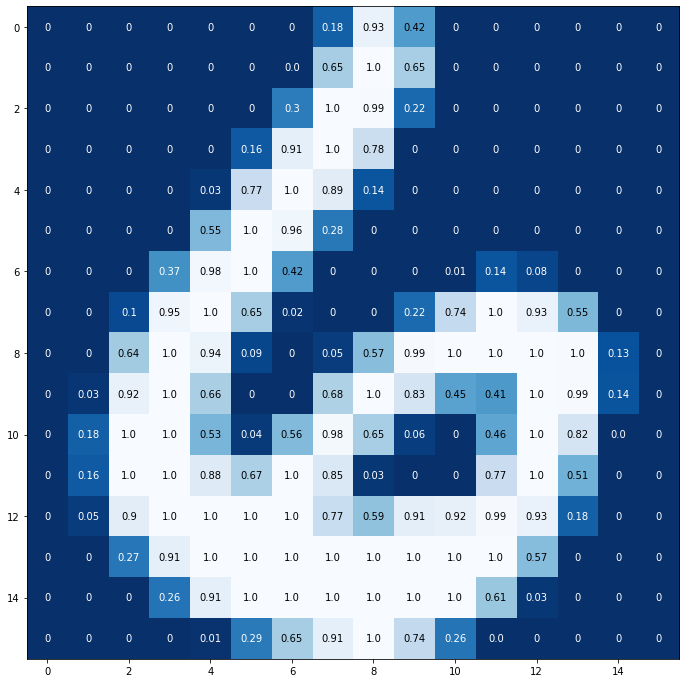

In [37]:
img = X_comb[0].reshape(16,16)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [38]:
print(y_comb.shape)

(9298,)


In [39]:
#one hot encode labels
import numpy as np

#We have 7291 numbers. For each number create 9 col.
y_combined = np.zeros((y_comb.shape[0], y_comb.max()+1), dtype=np.float32)#7291 rows,9cols
#ranges from 0->7290 ,0->9
y0, y1, y2, y3, y4, y5, y6, y7, y8, y9 = [],[],[],[],[],[],[],[],[],[]


for row in range(y_comb.shape[0]): #from 0 to 7291 
  for col in range(y_comb.max()+1):
    if(col == y_comb[row]):
      y_combined[row, col] = 1#col range from 0 to 9
      eval('y'+str(col)).append(int(1))
    else:
      y_combined[row, col] = -1
      eval('y'+str(col)).append(int(-1))

number=y_comb[3]
hot_encoded_number=y_combined[3,:]

print(f'Hot encoded numbers. E.g. number {number} becomes {hot_encoded_number}')

y0 = np.asarray(y0)
y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
y4 = np.asarray(y4)
y5 = np.asarray(y5)
y6 = np.asarray(y6)
y7 = np.asarray(y7)
y8 = np.asarray(y8)
y9 = np.asarray(y9)


Hot encoded numbers. E.g. number 7 becomes [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]


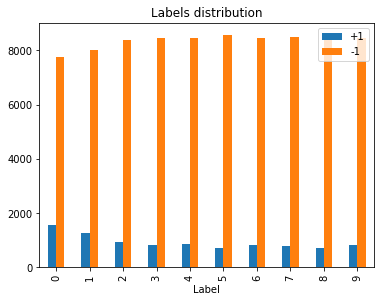

In [40]:
pos, neg = [], []
for i in numbers:
    index, count = np.unique(y_combined[:,i], return_counts=True)
    pos.append(np.int32(count[1]))
    neg.append(np.int32(count[0]))

df = pd.DataFrame(np.column_stack([numbers, pos, neg]), columns=['Label','+1','-1'])
fig = df.plot(x="Label", y=["+1", "-1"], kind="bar", title='Labels distribution', figsize=(6, 4.5)).get_figure()
fig.savefig("label_distribution.png")

In [41]:
df # Am dealing with unbalanced classes-->F1 as main metric
df = pd.DataFrame(np.column_stack([numbers, pos, neg]), columns=['Label','+1','-1'])
setsize=df["+1"]+df["-1"]
df.insert(1,"set size",setsize)
ratio=df["+1"]/df["-1"]
df.insert(4,"ratio +1 to -1",ratio)
print(df)





   Label  set size    +1    -1  ratio +1 to -1
0      0      9298  1553  7745        0.200516
1      1      9298  1269  8029        0.158052
2      2      9298   929  8369        0.111005
3      3      9298   824  8474        0.097239
4      4      9298   852  8446        0.100876
5      5      9298   716  8582        0.083430
6      6      9298   834  8464        0.098535
7      7      9298   792  8506        0.093111
8      8      9298   708  8590        0.082421
9      9      9298   821  8477        0.096850


In [95]:
df_X=pd.DataFrame(X_comb)
df_y=pd.DataFrame(y_comb)


In [43]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [96]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,...,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000,9298.000000
mean,0.001772,0.009778,0.024642,0.056681,0.113444,0.197046,0.317133,0.475385,0.471135,0.355109,...,0.403742,0.569268,0.557564,0.342886,0.175035,0.083272,0.039935,0.020951,0.009841,0.002540
std,0.024906,0.077603,0.122256,0.181135,0.251028,0.316307,0.359610,0.384756,0.377765,0.373693,...,0.388387,0.377318,0.378547,0.362020,0.292410,0.211465,0.152101,0.113515,0.076608,0.031923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,...,0.000000,0.167500,0.130250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140500,0.527500,0.496000,0.209000,...,0.326000,0.680000,0.667500,0.210500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.021000,0.311750,0.630000,0.848500,0.837000,0.717500,...,0.786000,0.919000,0.907000,0.673000,0.255375,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.819000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.796000


In [98]:
max_pixel_value=df_X.max().max()
min_pixel_value=df_X.min().min()
print(f'Pixel numbers are between {min_pixel_value} and {max_pixel_value}')

#no null values
nullno=df_X.isnull().any().any()
print(f'Are there are any null numbers in the set: {nullno}')


Pixel numbers are between 0.0 and 1.0
Are there are any null numbers in the set: False


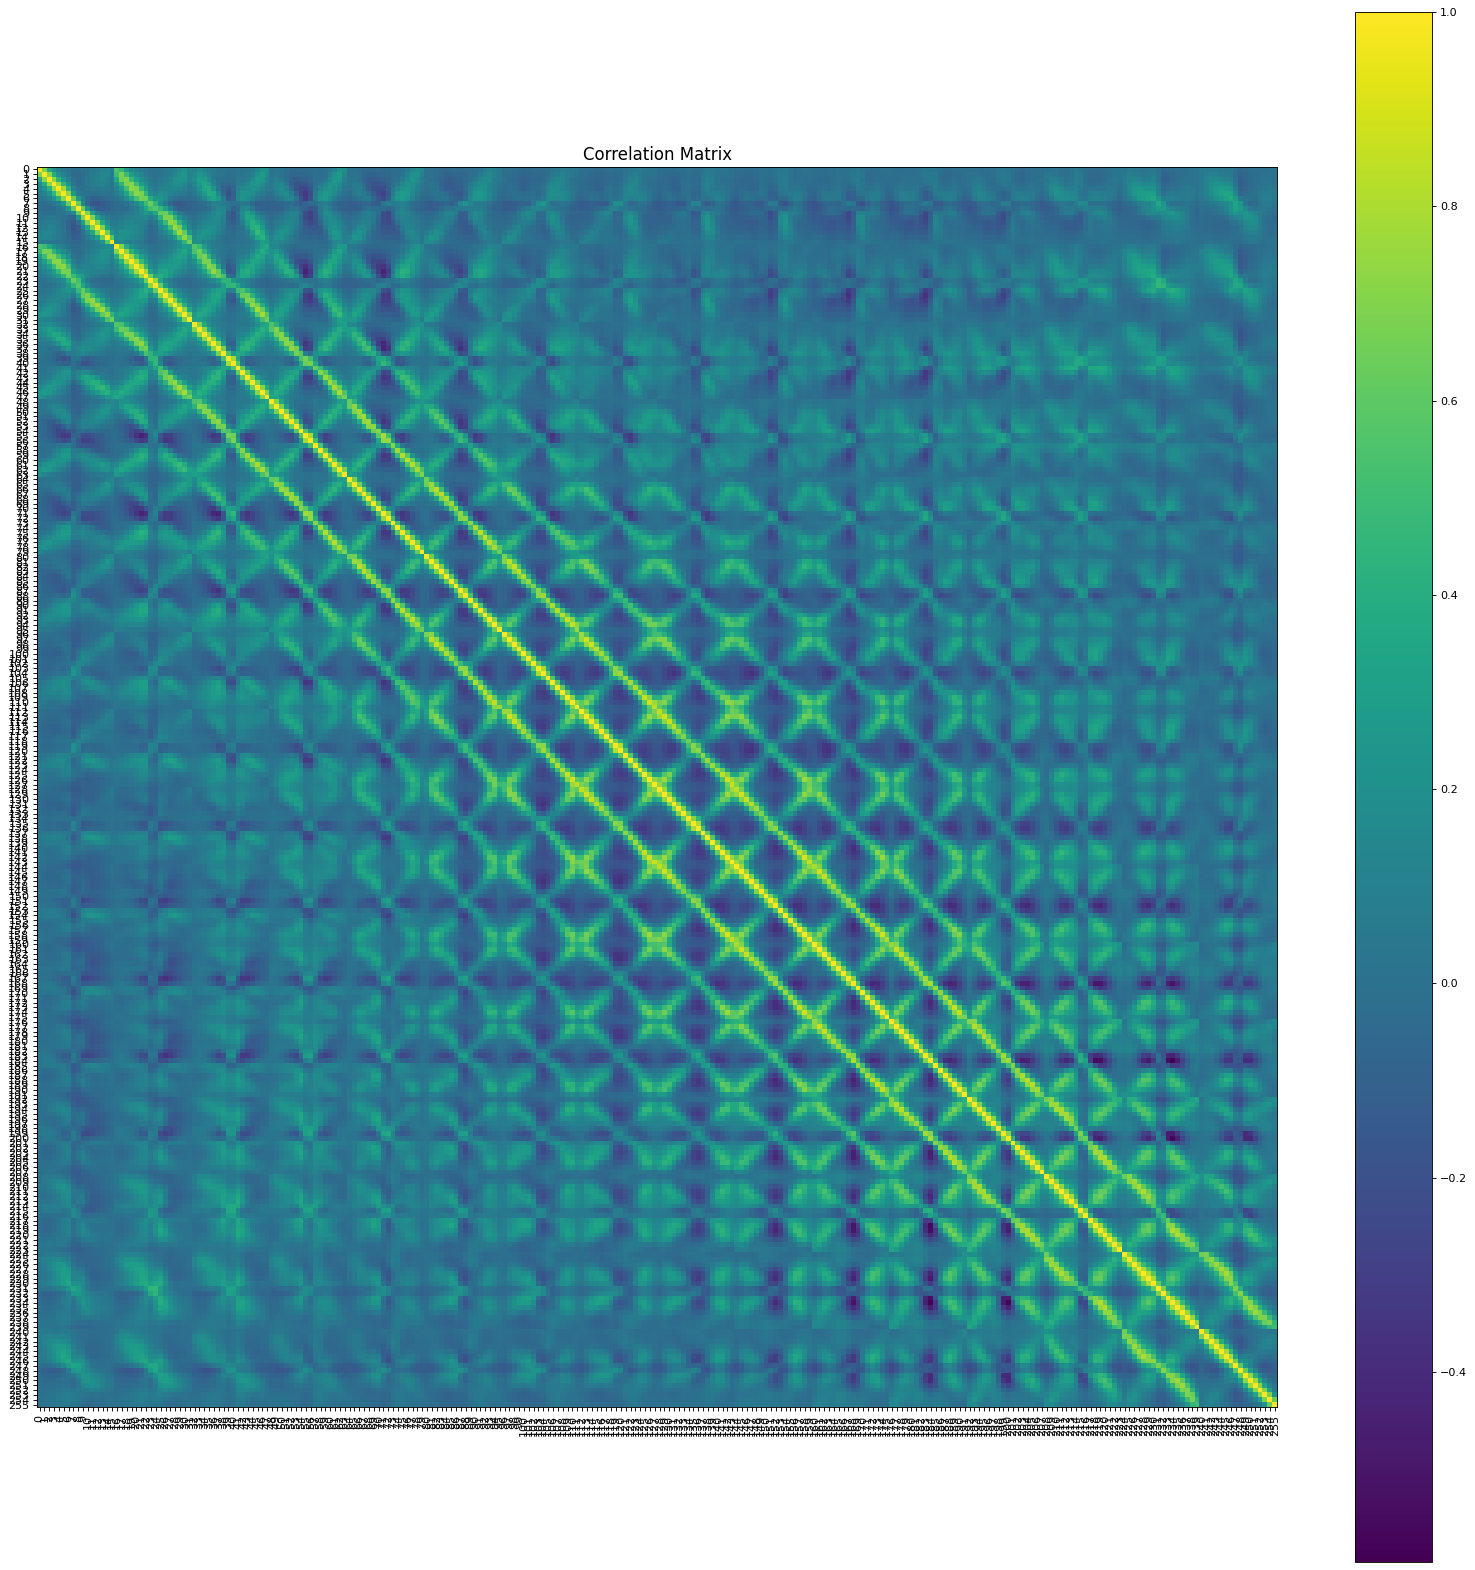

In [99]:
plotCorrelationMatrix(df_X, 25)
#Could do feature redn but then notice that (...)


Defining Pegasos, metrics, train-test, CV folds and vis

In [48]:
from random import randint

class KernelPegasos():
    # kernels and loss function
    ## Kernelised Pegasos with different kernel support:- "linear","guassian", "polynomial"
    def __init__(self,T=10,lamb=1e-3,kernel="gaussian"):
        ##lamb --> regularisation param
        self.kernel_list=("gaussian","polynomial", "linear")
        self.T=T
        self.pos_cl = 1
        self.neg_cl = -1
        self.lamb = lamb

        #kernel 
        if kernel not in self.kernel_list:
            raise Exception("Kernel not found!!\n")
        elif kernel == self.kernel_list[0]:
            self.kernel = self.gaussian_kernel
        elif kernel == self.kernel_list[1]:
                self.kernel = self.polynomial_kernel
        elif kernel == self.kernel_list[2]:
                self.kernel = self.linear_kernel
                
    def linear_kernel(self,x,y):
        return np.dot(x,y)

    def polynomial_kernel(self,x, y, p=4):
        return (1 + np.dot(x, y)) ** p

    def gaussian_kernel(self,x, y, variance=0.25):
        #sigma**2 is variance
        mean=np.linalg.norm(x-y)**2
        return np.exp(-mean / (2 * variance))

            
    def fit(self,x,y):
        ## Complexity :- O(#epoch * #train samples)
        try:
            x=x.toarray()
        except AttributeError:
            pass
        x = np.insert(x,x.shape[1],1,axis=1)
        m,n = x.shape[0],x.shape[1] ## m --> number of samples , n --> number of features
        self.alpha = np.zeros((self.T+1,m))#iterations,samples
        y = list(y)
        classes = sorted(set(y))#encode firs 
        if len(classes) != 2:
            raise Exception("Not a binary classification!!\n")

        for t in range(self.T):
            step = 1. / (self.lamb*(t+1))
            #-- Choose a random xit , yit
            it = np.random.randint(0,m)#m is number of samples (lenght y)
            xit, yit = x[it], y[it]
            #---For all j different than it , set the next alpha[j] to the previous 1
            for j in range(m):
                if j!=it:
                    self.alpha[t+1,j]=self.alpha[t,j]
            #Perform the sum over j of the following 
            sum_=0.0
            for j in range(m):
                sum_+=self.alpha[t,j]*self.kernel(xit,x[j])*y[j]#alpha weights
            sum_*=yit*step
            if sum_<1:
                self.alpha[t+1,it] = self.alpha[t,it]+1
            else:
                self.alpha[t+1,it]=self.alpha[t,it]
        self.alpha = self.alpha[self.T]
        self.y_train = y
        self.x_train = x
        print("fitting Complete!!\n")
        return self

    def predict(self,xtest):
        ## complexity O(#support vectors * #test samples)
        try:
            xtest=xtest.toarray()
        except AttributeError:
            pass
        xtest = np.insert(xtest,xtest.shape[1],1,axis=1)
        l = xtest.shape[0]#size of ytest
        m = self.alpha.shape[0]#size of ytrain
        scores = np.zeros(l)
        for i in range(l):
            score=0.0
            for k in range(m):
                if self.alpha[k]>0:
                    score+=self.alpha[k]*self.kernel(xtest[i],self.x_train[k])*self.y_train[k]
            scores[i]=score
        ypred = np.select([scores>0.0, scores<=0.0], [self.pos_cl, self.neg_cl])
        return ypred

    def score(self,X,y_test):
        y_pred= self.predict(X)
        errors=0
        for i in range(size(y_pred)):
            if(y_pred[i]!=y_test[i]):
                errors+=1
        zerooneloss = errors/len(y_test)        
        accuracy =  1- zerooneloss#0-1 mean loss
        return accuracy
    

In [130]:
def metrics(y_pred,y_test):
    tp,tn,fp,fn=0,0,0,0
    for i in range(size(y_pred)):
        if(y_pred[i]==y_test[i]):
            if(y_test[i]==-1):#negative
                tn+=1
            else:
                tp+=1                
        elif(y_pred[i]!=y_test[i]):
            if(y_test[i]==-1):#negative
                fp+=1
            else:
                fn+=1
    if((tp+fp)==0):
        precision=0
    else:
        precision=tp/(tp+fp)
    if((tn+fn)==0):
        fnratio = 0
    else:
        fnratio=fn/(tn+fn)
    if((tp+fn)==0):
        recall=0
    else:
        recall=tp/(tp+fn)
    
    if(((2*tp+fp+fn))==0):
        f1score=0
    else:
        f1score=2*tp/(2*tp+fp+fn)
    if((tp+fp)+(tn+fn)==0):
        zerooneloss=0
    else:
        zerooneloss=(fp+fn)/(tp+fp+tn+fn)
    accuracy = 1-zerooneloss
    print("TP FP TN FN : ",tp,fp,tn,fn )

    print("FN ratio: ", fnratio,"(",np.round(fnratio*100, 2),"%)")
    print("FP ratio: ", 1-precision,"(",np.round((1-precision)*100, 2),"%)")
    print("Precision: ", precision,"(",np.round(precision*100, 2),"%)")
    print("Recall: ", recall,"(",np.round(recall*100, 2),"%)")
    print("Accuracy: ", accuracy,"(",np.round(accuracy*100, 2),"%)")
    print("f1score: ", f1score,"(",np.round(f1score*100, 2),"%)")
    return precision,f1score

In [50]:
def non_shuffling_train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) 
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

In [51]:
# Plot image (prediction and true_label)
def plot_image( i, prediction, true_label, img):
  img =  img[i].reshape((16,16))

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  if prediction[i] == true_label[i]:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(prediction[i],
                                100*np.max(prediction),
                                true_label[i]),
                                color=color, fontsize=18)

In [52]:
class Cross_Validation:
    @staticmethod
    def partition(X_train,y_train,k=5):
        Xrows = size(X_train[:,1])#6229
        Xcols = size(X_train[1,:])#256
        print('Xrows ' + str(Xrows) + " Xcols " + str(Xcols))
        print("Add y_train to X_train")
        X_copy=np.zeros((Xrows,Xcols+1),dtype=np.float32)
        X_copy[:,256] = y_train
        X_copy[:,0:256] = X_train
        Xcols = size(X_copy[1,:])#256 cols
        Xrows = size(X_copy[:,1])#6229 samples rows
        print('Xrows ' + str(Xrows) + " Xcols " + str(Xcols))#6229x256 --> 6229x 257
    
        folds = np.array_split(X_copy, k)
        length=size(X_copy[1,:])-1
        return folds,length

Exploring Pegasos - y0 , different hyperparameters, train-test

In [159]:
#wout cv 
# First run
#for y=0
currentLabel=y0#this is label 0 -- have 
X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)
nRow_tr = y_train.shape[0]
nRow_te= y_test.shape[0]
print(f'There are {nRow_tr} rows in the training set for number 0')
print(f'There are {nRow_te} rows  in the test set for number 0')



classifier = KernelPegasos()#default values -- 10 e-3
classifier.fit(X_train, y_train)
train_score=classifier.score(X_train,y_train)
train_precision,train_f1score= metrics(classifier.predict(X_train),y_train)

y_pred=classifier.predict(X_test)
test_acc_score=classifier.score(X_test,y_test)
test_precision,test_f1score= metrics(y_pred,y_test)

print('For number=' + str(0) + ' With T=' + str(10) + ' and lambda=' + str(1e-3) + 
' train acc score= ' +  str(train_score)+ ' train avg precision= ' + str(train_precision) + ' train avg f1score= ' + str(train_f1score)
+ ' test avg acc= ' + str(test_acc_score) + ' test avg precision= ' + str(test_precision) + ' test avg f1score= ' + str(test_f1score)
)



There are 6229 rows in the training set for number 0
There are 3069 rows  in the test set for number 0
fitting Complete!!

TP FP TN FN :  949 506 4703 71
FN ratio:  0.014872224549643905 ( 1.49 %)
FP ratio:  0.34776632302405497 ( 34.78 %)
Precision:  0.652233676975945 ( 65.22 %)
Recall:  0.9303921568627451 ( 93.04 %)
Accuracy:  0.907368759030342 ( 90.74 %)
f1score:  0.7668686868686869 ( 76.69 %)
TP FP TN FN :  500 319 2217 33
FN ratio:  0.014666666666666666 ( 1.47 %)
FP ratio:  0.38949938949938945 ( 38.95 %)
Precision:  0.6105006105006106 ( 61.05 %)
Recall:  0.9380863039399625 ( 93.81 %)
Accuracy:  0.8853046594982079 ( 88.53 %)
f1score:  0.7396449704142012 ( 73.96 %)
For number=0 With T=10 and lambda=0.001 train acc score= 0.907368759030342 train avg precision= 0.652233676975945 train avg f1score= 0.7668686868686869 test avg acc= 0.8853046594982079 test avg precision= 0.6105006105006106 test avg f1score= 0.7396449704142012


In [ ]:
#wout cv 
# Second run
#for y=0
currentLabel=y0#this is label 0 -- have 
X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)
nRow_tr = y_train.shape[0]
nRow_te= y_test.shape[0]
print(f'There are {nRow_tr} rows in the training set for number 0')
print(f'There are {nRow_te} rows  in the test set for number 0')



classifier = KernelPegasos()#default values -- 10 e-3
classifier.fit(X_train, y_train)
train_score=classifier.score(X_train,y_train)
train_precision,train_f1score= metrics(classifier.predict(X_train),y_train)

y_pred=classifier.predict(X_test)
test_acc_score=classifier.score(X_test,y_test)
test_precision,test_f1score= metrics(y_pred,y_test)

print('For number=' + str(0) + ' With T=' + str(10) + ' and lambda=' + str(1e-3) + 
' train acc score= ' +  str(train_score)+ ' train avg precision= ' + str(train_precision) + ' train avg f1score= ' + str(train_f1score)
+ ' test avg acc= ' + str(test_acc_score) + ' test avg precision= ' + str(test_precision) + ' test avg f1score= ' + str(test_f1score)
)



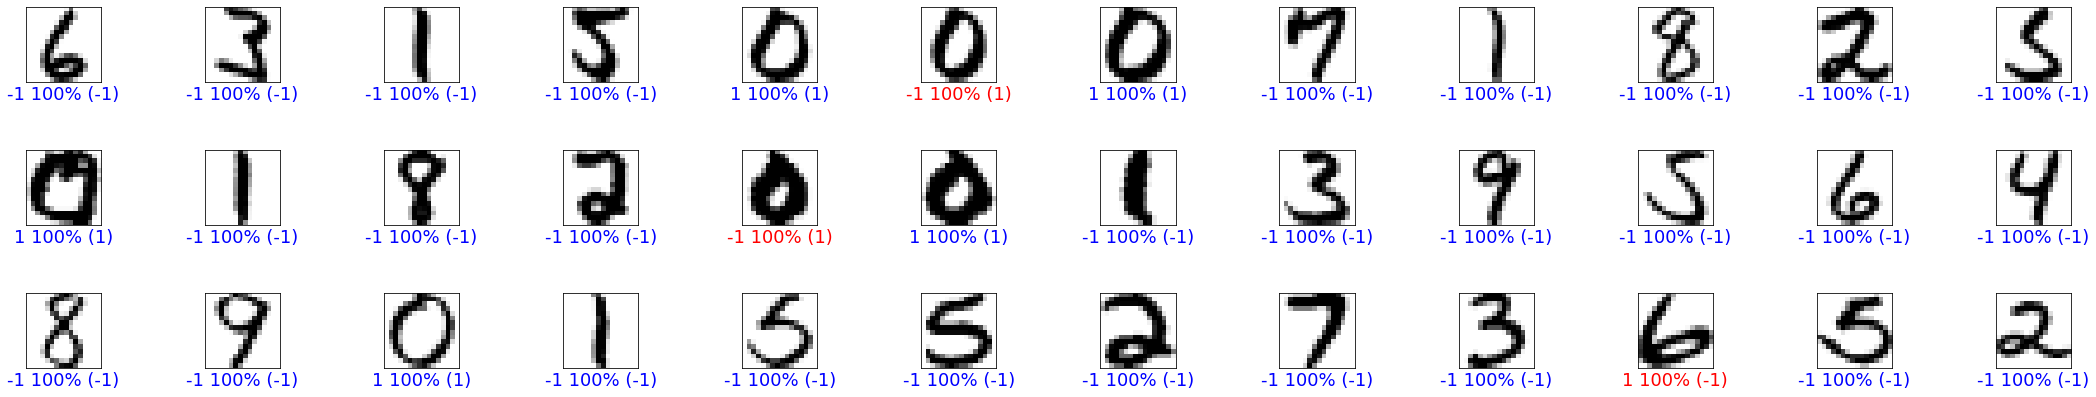

In [115]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))
for i in range(6*2*3):
    plt.subplot(num_rows, 2*2*num_cols, 2*i+1)
    plot_image(i+40,y_pred, y_test, X_test)
plt.tight_layout()
plt.show()


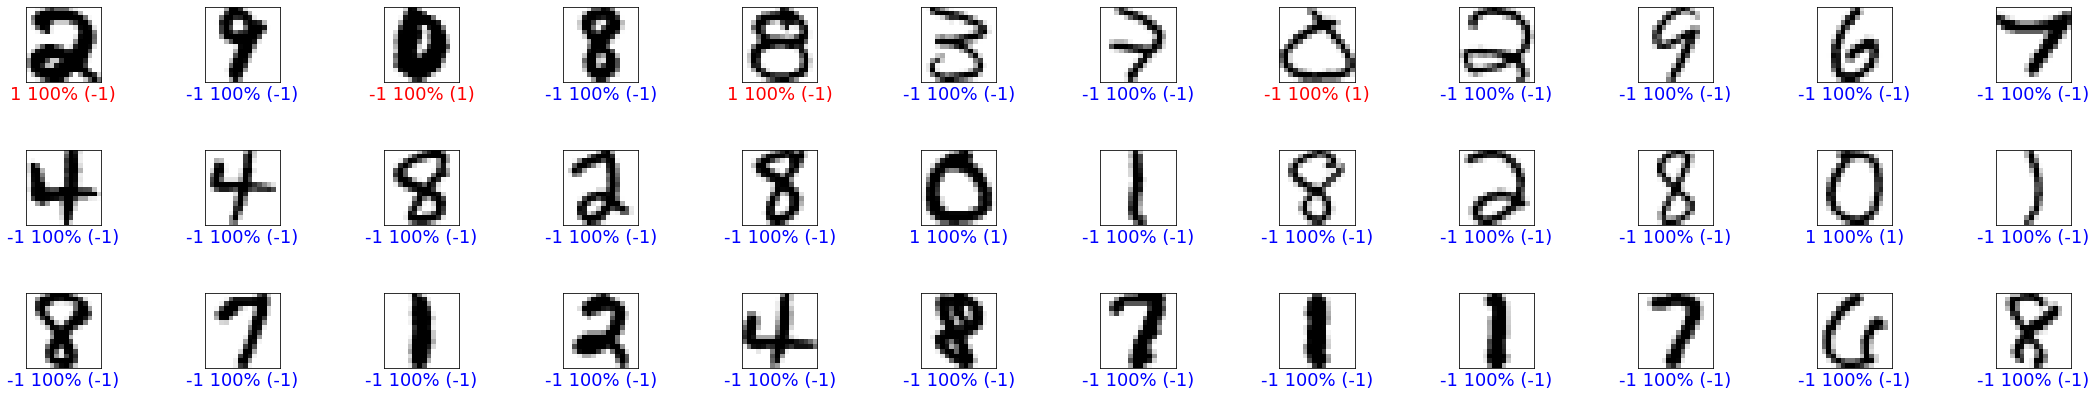

In [128]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))
for i in range(6*2*3):
    plt.subplot(num_rows, 2*2*num_cols, 2*i+1)
    plot_image(i+230,y_pred, y_test, X_test)
plt.tight_layout()
plt.show()


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
ite=[10,100]
lmdb=[1e-5,1e-3]
cv=5
rows = size(ite)*size(lmdb)
acc_scores=np.zeros(cv)
prec_scores=np.zeros(cv)
f1_scores=np.zeros(cv)
results = np.zeros((rows , 5))
# 5 (2 hyper+acc+precision+f1)* number of ite

folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

print('Performing 5-Fold validation')

col1no=-1
i=-1
for t in ite:
    col1no+=1
    col2no=-1
    for lm in lmdb:
        col2no+=1
        col3no=-1
        scores = np.zeros(5)   
        i+=1
        notvalid=0
        for kth in range (cv):
            xsubtest = folds[kth][:,:length] # Set ith fold to be test
            ysubtest = folds[kth][:,length]
            new_folds = np.row_stack(np.delete(folds,kth,0))
            xsubtrain = new_folds[:,:length]
            ysubtrain = new_folds[:,length]
            col3no += 1     
            svc = KernelPegasos(T=t, lamb=lm)
            svc.fit(xsubtrain, ysubtrain)
            acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
            prec,f1score= metrics(svc.predict(xsubtest), ysubtest)#vector 5 
            prec_scores[col3no] = prec#vector 5 
            f1_scores[col3no] = f1score#vector 5 
            if(prec==0):
                notvalid+=1
            # get the mean -- get 1 value (cv estimate)
        acc_score= acc_scores.mean()
        prec_score= sum(prec_scores)/(cv-notvalid)
        f1_score= sum(f1_scores)/(cv-notvalid)
        print('For number 0 With T=' + str(t) + ' and lambda=' + str(lm) + ' CV_accuracy= ' + str(acc_score)
        + ' CV_precision= '+str(prec_score) + ' CV_f1_score= '+ str(f1_score))
        results[i] = [t, lm, acc_score, prec_score, f1_score] #3rd col put mean(scores)


Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

TP FP TN FN :  157 42 951 96
FN ratio:  0.09169054441260745 ( 9.17 %)
FP ratio:  0.21105527638190957 ( 21.11 %)
Precision:  0.7889447236180904 ( 78.89 %)
Recall:  0.6205533596837944 ( 62.06 %)
Accuracy:  0.8892455858747994 ( 88.92 %)
f1score:  0.6946902654867256 ( 69.47 %)
fitting Complete!!

TP FP TN FN :  95 11 1003 137
FN ratio:  0.12017543859649123 ( 12.02 %)
FP ratio:  0.10377358490566035 ( 10.38 %)
Precision:  0.8962264150943396 ( 89.62 %)
Recall:  0.40948275862068967 ( 40.95 %)
Accuracy:  0.8812199036918138 ( 88.12 %)
f1score:  0.5621301775147929 ( 56.21 %)
fitting Complete!!

TP FP TN FN :  139 134 957 16
FN ratio:  0.01644398766700925 ( 1.64 %)
FP ratio:  0.4908424908424909 ( 49.08 %)
Precision:  0.5091575091575091 ( 50.92 %)
Recall:  0.896774193548387 ( 89.68 %)
Accuracy:  0.8796147672552167 ( 87.96 %)
f1score:  0.6495327102803738 ( 64.95 %)
fitti

In [161]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

df = DataFrame(results, columns=["ite", "lambda", "accuracy", "precision", "f1score"])
df


,ite,lambda,accuracy,precision,f1score
0,10.0,0.00001,0.898226,0.741448,0.674710
1,10.0,0.00100,0.866275,0.585165,0.535534
2,100.0,0.00001,0.964041,0.855433,0.896582
3,100.0,0.00100,0.965965,0.844403,0.901921


Text(0.5, 1.0, 'number 0, f1 score')

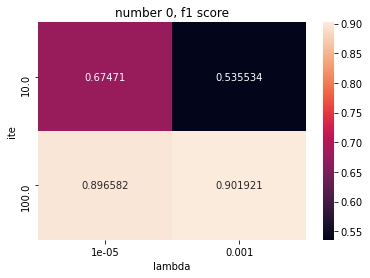

In [162]:
check=df["f1score"]
import matplotlib.pyplot as plt
import pandas as pd

pivoted_table = df.pivot(index='ite', columns='lambda', values='f1score')
pivoted_table.fillna(0, inplace=True)

sns.heatmap(pivoted_table,annot=True, fmt='g')
plt.title("number 0, f1 score")

In [137]:
index_f1= np.argmax(df["f1score"])#then get parametrs related to 
index_acc= np.argmax(df["accuracy"])#then get parametrs related to 
print('Row ' + str(index_acc)+ ' has the best accuracy')
print('Row ' + str(index_f1)+ ' has the best f1score')
print("--Extracting row --")
best_values= df.take([index_f1])
print(best_values)
arr_best_values = results[index_f1]

Row 3 has the best accuracy
Row 3 has the best f1score
--Extracting row --
     ite  lambda  accuracy  precision   f1score
3  100.0   0.001  0.971266   0.883693  0.912497


In [140]:
svc = KernelPegasos(T=100, lamb=1e-3)
svc.fit(X_train,y_train)#fit on the whole training
print("On test set")
y_pred=svc.predict(X_test)
precision,f1_score = metrics(y_pred,y_test)#this is independent 
accuracy =svc.score(X_test,y_test)
print('With hyperparameters T=100 and lamb=1e-5 we get a test score of ' #
'accuracy ' + str(accuracy) + ' precision '  +str(precision) + ' f1 score ' +str(f1_score))


fitting Complete!!

On test set
TP FP TN FN :  490 96 2440 43
FN ratio:  0.017317760773258157 ( 1.73 %)
FP ratio:  0.16382252559726962 ( 16.38 %)
Precision:  0.8361774744027304 ( 83.62 %)
Recall:  0.9193245778611632 ( 91.93 %)
Accuracy:  0.9547083740632127 ( 95.47 %)
f1score:  0.8757819481680071 ( 87.58 %)
With hyperparameters T=100 and lamb=1e-5 we get a test score of accuracy 0.9547083740632127 precision 0.8361774744027304 f1 score 0.8757819481680071


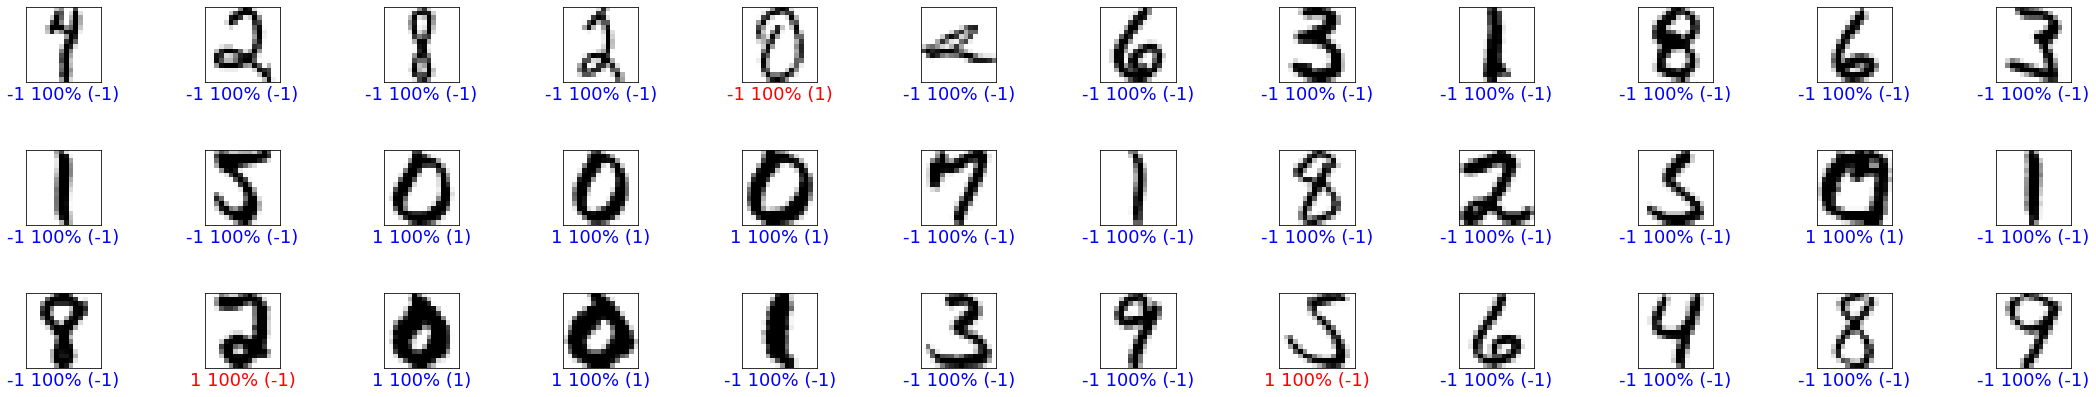

In [142]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(5*num_cols, 2*num_rows))#30,10
for i in range(6*2*3):
    plt.subplot(num_rows, 2*2*num_cols, 2*i+1)#5,12,
    plot_image(i+30,y_pred, y_test, X_test)#un numero
plt.tight_layout()
plt.show()


In [143]:
print('for training data ')
precision,f1score=metrics(svc.predict(X_train),y_train)

for training data 
TP FP TN FN :  958 127 5082 62
FN ratio:  0.012052877138413685 ( 1.21 %)
FP ratio:  0.11705069124423961 ( 11.71 %)
Precision:  0.8829493087557604 ( 88.29 %)
Recall:  0.9392156862745098 ( 93.92 %)
Accuracy:  0.9696580510515331 ( 96.97 %)
f1score:  0.9102137767220903 ( 91.02 %)


Exploring Pegasos - All numbers - Gaussian Kernel

In [63]:
#Do it on loop 0->9
#90 rows -- around 4h30
lim_num_classes=num_classes

import time
cv=5
count=-1
# Choose hyperparams
ite = [10,100,1000]
lmdb=[1e-7,1e-5,1]
rows = size(ite)*size(lmdb)*lim_num_classes
results = np.zeros((rows , 2+3+1+1)) # 7 (2 hyper+acc+prec+f1+time+testlabel)* number of ite
precision_scores = np.zeros(cv)
f1_scores = np.zeros(cv)
acc_scores=np.zeros(cv)

for j in range (0,lim_num_classes):
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print("--" + 'y' + str(j) +"--" )
    #Split in train test
    X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)

    folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

    print('Performing ' + str(cv) + '-Fold validation')
    col1no=-1

    for t in ite:
        col1no+=1
        col2no=-1
        for lm in lmdb:
                col2no+=1
                col3no=-1
                scores = np.zeros(cv)   #5 times cross val
                count+=1
                elaspedt=0
                notvalid=0
                for kth in range (cv):
                    xsubtest = folds[kth][:,:length] # Set ith fold to be test
                    ysubtest = folds[kth][:,length]
                    new_folds = np.row_stack(np.delete(folds,kth,0))
                    xsubtrain = new_folds[:,:length]
                    ysubtrain = new_folds[:,length]
                    col3no += 1
                    svc = KernelPegasos(T=t, lamb=lm)
                    start = time.time()     
                    svc.fit(xsubtrain, ysubtrain)
                    acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
                    end = time.time()
                    precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
                    if(precision==0):
                        notvalid+=1
                    precision_scores[col3no] = precision
                    f1_scores[col3no] = f1score
                    elaspedt+=(end-start)
                # get the mean -- get 1 value (cv estimate)
                #if i get precision 0 (it s bcs tp=0) -- don t average (cant say anything on it)

                mean_acc = acc_scores.mean()#will get nxm mean scores --> get
                mean_precision=sum(precision_scores)/(cv-notvalid)
                mean_f1= sum(f1_scores)/(cv-notvalid)

                results[count] = [j, t, lm, mean_acc,mean_precision,mean_f1, elaspedt] #3rd col put mean(scores)
                print('Print row ' + str(count) + ' For number = ' + str(j) + ' with T=' + str(t) 
                +' and lambda=' + str(lm) + ' avg_acc=' + str(mean_acc)+ ' avg_precision=' + str(mean_precision)
                +' avg_f1_score=' + str(mean_f1)+ ' time ' +str(elaspedt))

--y0--
Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

FN ratio:  0.2030497592295345 ( 20.3 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.7969502407704655 ( 79.7 %)
f1score:  0.0 ( 0.0 %)
fitting Complete!!

FN ratio:  0.0621301775147929 ( 6.21 %)
FP ratio:  0.27155172413793105 ( 27.16 %)
Precision:  0.728448275862069 ( 72.84 %)
Recall:  0.728448275862069 ( 72.84 %)
Accuracy:  0.898876404494382 ( 89.89 %)
f1score:  0.728448275862069 ( 72.84 %)
fitting Complete!!

FN ratio:  0.004733727810650888 ( 0.47 %)
FP ratio:  0.6234413965087282 ( 62.34 %)
Precision:  0.3765586034912718 ( 37.66 %)
Recall:  0.9741935483870968 ( 97.42 %)
Accuracy:  0.7961476725521669 ( 79.61 %)
f1score:  0.5431654676258992 ( 54.32 %)
fitting Complete!!

FN ratio:  0.14097744360902256 ( 14.1 %)
FP ratio:  0.6923076923076923 ( 69.23 %)
Precision:  0.3076923076923077 ( 30.77 %)
Recall:  0.27184466019417

In [163]:
best_params = np.zeros((10,7))

df = pd.DataFrame(results, columns=["number", "ite", "lambda", "acc_score","prec_score", "f1_score", "time"])
df['number'] = df['number'].astype('int')
print(df)

ValueError: Shape of passed values is (4, 5), indices imply (4, 7)

In [ ]:
# for given rows check 
for i in range(0,10):
    check = df[df["number"] == i]
    index = np.argmax(check["f1_score"])
    best_values= check.take([index])
    best_params[i] = best_values

df_best_params = pd.DataFrame(best_params, columns=["number", "ite", "lambda", "acc_score", "prec_score", "f1_score" , "time",])
print(df_best_params)

In [65]:
df_best_params.groupby(['ite', 'lambda']).size()


ite     lambda      
1000.0  1.000000e-07    4
        1.000000e-05    4
        1.000000e+00    2
dtype: int64

In [66]:
# With the best T and lambda evaluatemodel ontest set (k-fold)
#Fit on whole data to get an estimate of the performance of the model (CV test)
acc_scores = np.zeros(5)
prec_scores = np.zeros(5)
f1_scores = np.zeros(5)
fin_results= np.zeros((10,4))
#chosen T
best_T=1000
best_lamb=1e-7
print('Evaluating test set')
print('Chose T= ' + str(best_T) + ' lambda= ' + str(best_lamb) )
for j in range (0,10):
    telaps=0
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print('---------y' + str(j) + '------------')
    svc = KernelPegasos(T=best_T, lamb=best_lamb)
    col3no=-1
    folds, length = Cross_Validation.partition(X_comb,currentLabel)
    notvalid=0
    for kth in range (cv):
        xsubtest = folds[kth][:,:length] # Set ith fold to be test
        ysubtest = folds[kth][:,length]
        new_folds = np.row_stack(np.delete(folds,kth,0))
        xsubtrain = new_folds[:,:length]
        ysubtrain = new_folds[:,length]
        col3no += 1       
        start=time.time()     
        svc.fit(xsubtrain,ysubtrain)
        acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
        end=time.time()
        precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
        prec_scores[col3no] = precision
        f1_scores[col3no] = f1score
        telaps+=end-start
        if(precision==0):
            notvalid+=1
    # get the mean -- get 1 value (cv estimate)
    mean_acc_score= sum(acc_scores)/len(acc_scores)
    mean_prec_scores= sum(prec_scores)/(cv-notvalid)
    mean_f1_scores= sum(f1_scores)/(cv-notvalid)

    print('For number ' +str(j) + ' acc CV score=' + str(mean_acc_score)+ ' prec CV score=' + str(mean_prec_scores) 
        + ' f1score CV score=' + str(mean_f1_scores)+ ' time ' +str(telaps))
    fin_results[j]=[mean_acc_score,mean_prec_scores,mean_f1_scores,telaps]


Evaluating test set
Chose T= 1000 lambda= 1e-07
---------y0------------
Xrows 9298 Xcols 256
Add y_train to X_train before shuffling
Xrows 9298 Xcols 257
fitting Complete!!

FN ratio:  0.003367003367003367 ( 0.34 %)
FP ratio:  0.04266666666666663 ( 4.27 %)
Precision:  0.9573333333333334 ( 95.73 %)
Recall:  0.9862637362637363 ( 98.63 %)
Accuracy:  0.9887096774193549 ( 98.87 %)
f1score:  0.9715832205683356 ( 97.16 %)
fitting Complete!!

FN ratio:  0.0025493945188017845 ( 0.25 %)
FP ratio:  0.08247422680412375 ( 8.25 %)
Precision:  0.9175257731958762 ( 91.75 %)
Recall:  0.985239852398524 ( 98.52 %)
Accuracy:  0.9849462365591398 ( 98.49 %)
f1score:  0.9501779359430605 ( 95.02 %)
fitting Complete!!

FN ratio:  0.005076142131979695 ( 0.51 %)
FP ratio:  0.017605633802816878 ( 1.76 %)
Precision:  0.9823943661971831 ( 98.24 %)
Recall:  0.9721254355400697 ( 97.21 %)
Accuracy:  0.9930107526881721 ( 99.3 %)
f1score:  0.9772329246935202 ( 97.72 %)
fitting Complete!!

FN ratio:  0.003236245954692557

In [67]:
df_final_model= pd.DataFrame(fin_results, columns=["CV acc score", "CV prec score", "CV f1score", "CV time"])
print(df_final_model)


   CV acc score  CV prec score  CV f1score     CV time
0      0.987739       0.946972    0.963853  511.979087
1      0.991396       0.951854    0.968686  512.679165
2      0.983760       0.939440    0.915446  510.779441
3      0.981178       0.868445    0.888744  507.293234
4      0.976984       0.910299    0.869666  518.324435
5      0.982254       0.894255    0.882421  513.511616
6      0.989783       0.940504    0.943252  509.999770
7      0.985696       0.893270    0.917175  511.248409
8      0.983759       0.935742    0.888152  510.518315
9      0.975479       0.817616    0.863383  507.294201


In [68]:
index = np.argmin(df_final_model["CV f1score"])
print("Worst value is for number = "+ str(index))
worst_value= df_final_model.take([index])
print(worst_value)


Worst value is for number = 9
   CV acc score  CV prec score  CV f1score     CV time
9      0.975479       0.817616    0.863383  507.294201


Exploring Pegasos - All numbers - Linear Kernel

In [73]:
#Do it on loop 0->9
#Trying with different kernel
#90 rows -- around 4h30
lim_num_classes=num_classes

import time
cv=5
count=-1
# Choose hyperparams
ite = [10,100,1000]
lmdb=[1e-7,1e-5,1]
rows = size(ite)*size(lmdb)*lim_num_classes
results_lin = np.zeros((rows , 2+3+1+1)) # 7 (2 hyper+acc+prec+f1+time+testlabel)* number of ite
precision_scores = np.zeros(cv)
f1_scores = np.zeros(cv)
acc_scores=np.zeros(cv)

for j in range (0,lim_num_classes):
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print("--" + 'y' + str(j) +"--" )
    #Split in train test
    X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)

    folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

    print('Performing ' + str(cv) + '-Fold validation')
    col1no=-1

    for t in ite:
        col1no+=1
        col2no=-1
        for lm in lmdb:
                col2no+=1
                col3no=-1
                scores = np.zeros(cv)   #5 times cross val
                count+=1
                elaspedt=0
                notvalid=0
                for kth in range (cv):
                    xsubtest = folds[kth][:,:length] # Set ith fold to be test
                    ysubtest = folds[kth][:,length]
                    new_folds = np.row_stack(np.delete(folds,kth,0))
                    xsubtrain = new_folds[:,:length]
                    ysubtrain = new_folds[:,length]
                    col3no += 1
                    svc = KernelPegasos(T=t, lamb=lm,kernel="linear")
                    start = time.time()     
                    svc.fit(xsubtrain, ysubtrain)
                    acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
                    end = time.time()
                    precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
                    precision_scores[col3no] = precision
                    f1_scores[col3no] = f1score
                    elaspedt+=(end-start)
                    if(precision==0):
                        notvalid+=1
                # get the mean -- get 1 value (cv estimate)
                mean_acc = acc_scores.mean()#will get nxm mean scores --> get
                mean_prec_scores= sum(prec_scores)/(cv-notvalid)
                mean_f1_scores= sum(f1_scores)/(cv-notvalid)
                results_lin[count] = [j, t, lm, mean_acc,mean_precision,mean_f1, elaspedt] #3rd col put mean(scores)
                print('Print row ' + str(count) + ' For number = ' + str(j) + ' with T=' + str(t) 
                +' and lambda=' + str(lm) + ' avg_acc=' + str(mean_acc)+ ' av_precision=' + str(mean_precision)
                +' avg_f1_score=' + str(mean_f1)+ ' time ' +str(elaspedt))

--y0--
Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

FN ratio:  0.2030497592295345 ( 20.3 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.7969502407704655 ( 79.7 %)
f1score:  0.0 ( 0.0 %)
fitting Complete!!

FN ratio:  0.18619582664526485 ( 18.62 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.8138041733547352 ( 81.38 %)
f1score:  0.0 ( 0.0 %)
fitting Complete!!

FN ratio:  0.04079696394686907 ( 4.08 %)
FP ratio:  0.41666666666666663 ( 41.67 %)
Precision:  0.5833333333333334 ( 58.33 %)
Recall:  0.7225806451612903 ( 72.26 %)
Accuracy:  0.9012841091492777 ( 90.13 %)
f1score:  0.6455331412103746 ( 64.55 %)
fitting Complete!!

FN ratio:  0.1653290529695024 ( 16.53 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.8346709470304976 ( 83.47 %)
f1score:  0.0 ( 0.0 %)
fitting Complete!!

FN ratio:  0.035 ( 3.5 %)
FP

In [74]:
best_params_lin = np.zeros((10,7))

df_lin = pd.DataFrame(results_lin, columns=["number", "ite", "lambda", "acc_score","prec_score", "f1_score", "time"])
df_lin['number'] = df_lin['number'].astype('int')
# for given rows check 
print(df_lin)

   number     ite        lambda  acc_score  prec_score  f1_score       time
0     0.0  1000.0  1.000000e-05   0.971908    0.923121  0.910044  74.736243
1     1.0  1000.0  1.000000e-07   0.992133    0.972920  0.973251  74.377385
2     2.0  1000.0  1.000000e-05   0.964360    0.845309  0.815267  74.754516
3     3.0  1000.0  1.000000e-07   0.971744    0.936188  0.800852  74.127697
4     4.0  1000.0  1.000000e-05   0.956493    0.834326  0.750940  74.332076
5     5.0  1000.0  1.000000e-05   0.968212    0.815030  0.773602  74.172673
6     6.0  1000.0  1.000000e-07   0.970463    0.826281  0.838697  74.885381
7     7.0  1000.0  1.000000e-07   0.989726    0.955529  0.939834  74.173819
8     8.0  1000.0  1.000000e-07   0.960668    0.843942  0.628780  76.194756
9     9.0  1000.0  1.000000e-07   0.934008    0.668772  0.709721  75.730303


In [ ]:
# for given rows check 
for i in range(0,10):
    check = df_lin[df_lin["number"] == i]
    index = np.argmax(check["f1_score"])
    best_values= check.take([index])
    best_params_lin[i] = best_values

df_best_params_lin = pd.DataFrame(best_params_lin, columns=["number", "ite", "lambda", "acc_score", "prec_score", "f1_score" , "time",])
print(df_best_params_lin)

In [75]:
df_best_params_lin.groupby(['ite', 'lambda']).size()

ite     lambda      
1000.0  1.000000e-07    6
        1.000000e-05    4
dtype: int64

In [76]:
# With the best T and lambda evaluatemodel ontest set (k-fold)
#Fit on whole data to get an estimate of the performance of the model (CV test)
acc_scores = np.zeros(5)
prec_scores = np.zeros(5)
f1_scores = np.zeros(5)
fin_results_lin= np.zeros((10,4))
#chosen T
best_T=1000###############################################################
best_lamb=1e-7############################################################
print('Evaluating test set')
print('Chose T= ' + str(best_T) + ' lambda= ' + str(best_lamb) )
for j in range (0,10):
    telaps=0
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print('---------y' + str(j) + '------------')
    svc = KernelPegasos(T=best_T, lamb=best_lamb, kernel="linear")
    col3no=-1
    folds, length = Cross_Validation.partition(X_comb,currentLabel)
    notvalid=0
    for kth in range (cv):
        xsubtest = folds[kth][:,:length] # Set ith fold to be test
        ysubtest = folds[kth][:,length]
        new_folds = np.row_stack(np.delete(folds,kth,0))
        xsubtrain = new_folds[:,:length]
        ysubtrain = new_folds[:,length]
        col3no += 1       
        start=time.time()     
        svc.fit(xsubtrain,ysubtrain)
        acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
        end=time.time()
        precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
        prec_scores[col3no] = precision
        f1_scores[col3no] = f1score
        telaps+=end-start
        if(precision==0):
            notvalid+=1
    # get the mean -- get 1 value (cv estimate)
    mean_acc_score= sum(acc_scores)/len(acc_scores)
    mean_prec_scores= sum(prec_scores)/(cv-notvalid)
    mean_f1_scores= sum(f1_scores)/(cv-notvalid)
    print('For number ' +str(j) + ' acc CV score=' + str(mean_acc_score)+ ' prec CV score=' + str(mean_prec_scores) 
        + ' f1score CV score=' + str(mean_f1_scores)+ ' time ' +str(telaps))
    fin_results_lin[j]=[mean_acc_score,mean_prec_scores,mean_f1_scores,telaps]
#@55mins

Evaluating test set
Chose T= 1000 lambda= 1e-07
---------y0------------
Xrows 9298 Xcols 256
Add y_train to X_train before shuffling
Xrows 9298 Xcols 257
fitting Complete!!

FN ratio:  0.010796221322537112 ( 1.08 %)
FP ratio:  0.07936507936507942 ( 7.94 %)
Precision:  0.9206349206349206 ( 92.06 %)
Recall:  0.9560439560439561 ( 95.6 %)
Accuracy:  0.975268817204301 ( 97.53 %)
f1score:  0.9380053908355795 ( 93.8 %)
fitting Complete!!

FN ratio:  0.0009372071227741331 ( 0.09 %)
FP ratio:  0.6595208070617906 ( 65.95 %)
Precision:  0.34047919293820933 ( 34.05 %)
Recall:  0.996309963099631 ( 99.63 %)
Accuracy:  0.7182795698924731 ( 71.83 %)
f1score:  0.5075187969924813 ( 50.75 %)
fitting Complete!!

FN ratio:  0.05021173623714459 ( 5.02 %)
FP ratio:  0.01449275362318836 ( 1.45 %)
Precision:  0.9855072463768116 ( 98.55 %)
Recall:  0.710801393728223 ( 71.08 %)
Accuracy:  0.953763440860215 ( 95.38 %)
f1score:  0.8259109311740891 ( 82.59 %)
fitting Complete!!

FN ratio:  0.003986710963455149 ( 0.

In [77]:
df_final_model_lin= pd.DataFrame(fin_results_lin, columns=["CV acc score", "CV prec score", "CV f1score", "CV time"])
print(df_final_model_lin)


   CV acc score  CV prec score  CV f1score     CV time
0      0.917090       0.797321    0.819655  119.451334
1      0.965696       0.853229    0.892413  120.737053
2      0.946873       0.734902    0.786581  121.080070
3      0.960742       0.799501    0.768268  118.319203
4      0.953326       0.765223    0.690309  119.340475
5      0.939551       0.684648    0.668544  119.181723
6      0.970101       0.867431    0.831146  123.607152
7      0.940100       0.656958    0.754250  126.496301
8      0.939988       0.633941    0.636921  123.450886
9      0.953858       0.857299    0.628659  119.280129


Exploring Pegasos - All numbers - Polynomial Kernel

In [78]:
#Do it on loop 0->9
#Try with different kernel
#90 rows -- around 4h30
lim_num_classes=num_classes

import time
cv=5
count=-1
# Choose hyperparams
ite = [10,100,1000]
lmdb=[1e-7,1e-5,1]
rows = size(ite)*size(lmdb)*lim_num_classes
results_poly = np.zeros((rows , 2+3+1+1)) # 7 (2 hyper+acc+prec+f1+time+testlabel)* number of ite
precision_scores = np.zeros(cv)
f1_scores = np.zeros(cv)
acc_scores=np.zeros(cv)

for j in range (0,lim_num_classes):
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print("--" + 'y' + str(j) +"--" )
    #Split in train test
    X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)

    folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

    print('Performing ' + str(cv) + '-Fold validation')
    col1no=-1

    for t in ite:
        col1no+=1
        col2no=-1
        for lm in lmdb:
                col2no+=1
                col3no=-1
                scores = np.zeros(cv)   #5 times cross val
                count+=1
                elaspedt=0
                notvalid=0
                for kth in range (cv):
                    xsubtest = folds[kth][:,:length] # Set ith fold to be test
                    ysubtest = folds[kth][:,length]
                    new_folds = np.row_stack(np.delete(folds,kth,0))
                    xsubtrain = new_folds[:,:length]
                    ysubtrain = new_folds[:,length]
                    col3no += 1
                    svc = KernelPegasos(T=t, lamb=lm,kernel="polynomial")
                    start = time.time()     
                    svc.fit(xsubtrain, ysubtrain)
                    acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
                    end = time.time()
                    precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
                    precision_scores[col3no] = precision
                    f1_scores[col3no] = f1score
                    elaspedt+=(end-start)
                    if(precision==0):
                        notvalid+=1
                # get the mean -- get 1 value (cv estimate)
                mean_acc_scores = acc_scores.mean()#will get nxm mean scores --> get
                mean_prec_scores= sum(prec_scores)/(cv-notvalid)
                mean_f1_scores= sum(f1_scores)/(cv-notvalid)
                results_poly[count] = [j, t, lm, mean_acc_scores,mean_prec_scores,mean_f1_scores, elaspedt] #3rd col put mean(scores)
                print('Print row ' + str(count) + ' For number = ' + str(j) + ' with T=' + str(t) 
                +' and lambda=' + str(lm) + ' avg_acc=' + str(mean_acc_scores)+ ' av_precision=' + str(mean_prec_scores)
                +' avg_f1_score=' + str(mean_f1_scores)+ ' time ' +str(elaspedt))

--y0--
Xrows 6229 Xcols 256
Add y_train to X_train before shuffling
Xrows 6229 Xcols 257
Performing 5-Fold validation
fitting Complete!!

FN ratio:  0.2030497592295345 ( 20.3 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.7969502407704655 ( 79.7 %)
f1score:  0.0 ( 0.0 %)
fitting Complete!!

FN ratio:  0.1016949152542373 ( 10.17 %)
FP ratio:  0.05600000000000005 ( 5.6 %)
Precision:  0.944 ( 94.4 %)
Recall:  0.5086206896551724 ( 50.86 %)
Accuracy:  0.9028892455858748 ( 90.29 %)
f1score:  0.6610644257703081 ( 66.11 %)
fitting Complete!!

FN ratio:  0.038622129436325675 ( 3.86 %)
FP ratio:  0.5902777777777778 ( 59.03 %)
Precision:  0.4097222222222222 ( 40.97 %)
Recall:  0.7612903225806451 ( 76.13 %)
Accuracy:  0.833868378812199 ( 83.39 %)
f1score:  0.5327313769751693 ( 53.27 %)
fitting Complete!!

FN ratio:  0.1653290529695024 ( 16.53 %)
FP ratio:  1 ( 100 %)
Precision:  0 ( 0 %)
Recall:  0.0 ( 0.0 %)
Accuracy:  0.8346709470304976 ( 83.47 %)
f1score:  0.0 

In [79]:
best_params_poly = np.zeros((10,7))

df_poly = pd.DataFrame(results_poly, columns=["number", "ite", "lambda", "acc_score","prec_score", "f1_score", "time"])
df_poly['number'] = df_poly['number'].astype('int')
print(df_poly)

   number     ite        lambda  acc_score  prec_score  f1_score        time
0     0.0  1000.0  1.000000e-05   0.988441    0.958048  0.962704  149.034541
1     1.0  1000.0  1.000000e-07   0.993739    0.964169  0.976751  148.972255
2     2.0  1000.0  1.000000e-07   0.979772    0.927928  0.891949  151.026033
3     3.0  1000.0  1.000000e-07   0.978647    0.884528  0.878545  152.626040
4     4.0  1000.0  1.000000e-07   0.974155    0.857475  0.856947  150.175277
5     5.0  1000.0  1.000000e-07   0.973993    0.889552  0.803782  150.684599
6     6.0  1000.0  1.000000e-05   0.984268    0.914814  0.911104  151.122229
7     7.0  1000.0  1.000000e+00   0.985713    0.947546  0.919113  154.155672
8     8.0  1000.0  1.000000e+00   0.960669    0.703686  0.753323  153.798728
9     9.0  1000.0  1.000000e-05   0.966768    0.821528  0.813112  152.126855


In [ ]:
# for given rows check 
for i in range(0,10):
    check = df_poly[df_poly["number"] == i]
    index = np.argmax(check["f1_score"])
    best_values= check.take([index])
    best_params_poly[i] = best_values

df_best_params_poly = pd.DataFrame(best_params_poly, columns=["number", "ite", "lambda", "acc_score", "prec_score", "f1_score" , "time",])
print(df_best_params_poly)

In [80]:
df_best_params_poly.groupby(['ite', 'lambda']).size()

ite     lambda      
1000.0  1.000000e-07    5
        1.000000e-05    3
        1.000000e+00    2
dtype: int64

In [81]:
# With the best T and lambda evaluatemodel ontest set (k-fold)
#Fit on whole data to get an estimate of the performance of the model (CV test)
acc_scores = np.zeros(5)
prec_scores = np.zeros(5)
f1_scores = np.zeros(5)
fin_results_poly= np.zeros((10,4))
#chosen T
best_T=1000###############################################################
best_lamb=1e-7############################################################
print('Evaluating test set')
print('Chose T= ' + str(best_T) + ' lambda= ' + str(best_lamb) )
for j in range (0,10):
    telaps=0
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print('---------y' + str(j) + '------------')
    svc = KernelPegasos(T=best_T, lamb=best_lamb, kernel="polynomial")
    col3no=-1
    folds, length = Cross_Validation.partition(X_comb,currentLabel)
    notvalid=0
    for kth in range (cv):
        xsubtest = folds[kth][:,:length] # Set ith fold to be test
        ysubtest = folds[kth][:,length]
        new_folds = np.row_stack(np.delete(folds,kth,0))
        xsubtrain = new_folds[:,:length]
        ysubtrain = new_folds[:,length]
        col3no += 1       
        start=time.time()     
        svc.fit(xsubtrain,ysubtrain)
        acc_scores[col3no] = svc.score(xsubtest, ysubtest)#vector 5 
        end=time.time()
        precision,f1score=metrics(svc.predict(xsubtest),ysubtest)#precision f1score
        prec_scores[col3no] = precision
        f1_scores[col3no] = f1score
        telaps+=end-start
        if(precision==0):
            notvalid+=1
    # get the mean -- get 1 value (cv estimate)
    mean_acc_score= sum(acc_scores)/len(acc_scores)
    mean_prec_scores= sum(prec_scores)/(cv-notvalid)
    mean_f1_scores= sum(f1_scores)/(cv-notvalid)

    print('For number ' +str(j) + ' acc CV score=' + str(mean_acc_score)+ ' prec CV score=' + str(mean_prec_scores) 
        + ' f1score CV score=' + str(mean_f1_scores)+ ' time ' +str(telaps))
    fin_results_poly[j]=[mean_acc_score,mean_prec_scores,mean_f1_scores,telaps]


Evaluating test set
Chose T= 1000 lambda= 1e-07
---------y0------------
Xrows 9298 Xcols 256
Add y_train to X_train before shuffling
Xrows 9298 Xcols 257
fitting Complete!!

FN ratio:  0.0053404539385847796 ( 0.53 %)
FP ratio:  0.016574585635359074 ( 1.66 %)
Precision:  0.9834254143646409 ( 98.34 %)
Recall:  0.978021978021978 ( 97.8 %)
Accuracy:  0.9924731182795699 ( 99.25 %)
f1score:  0.9807162534435262 ( 98.07 %)
fitting Complete!!

FN ratio:  0.002570694087403599 ( 0.26 %)
FP ratio:  0.12171052631578949 ( 12.17 %)
Precision:  0.8782894736842105 ( 87.83 %)
Recall:  0.985239852398524 ( 98.52 %)
Accuracy:  0.9779569892473118 ( 97.8 %)
f1score:  0.928695652173913 ( 92.87 %)
fitting Complete!!

FN ratio:  0.015743073047858942 ( 1.57 %)
FP ratio:  0.03676470588235292 ( 3.68 %)
Precision:  0.9632352941176471 ( 96.32 %)
Recall:  0.9128919860627178 ( 91.29 %)
Accuracy:  0.9811827956989247 ( 98.12 %)
f1score:  0.9373881932021467 ( 93.74 %)
fitting Complete!!

FN ratio:  0.01589319771137953 ( 

In [82]:
df_final_model_poly= pd.DataFrame(fin_results_poly, columns=["CV acc score", "CV prec score", "CV f1score", "CV time"])
print(df_final_model_poly)


   CV acc score  CV prec score  CV f1score     CV time
0      0.981393       0.938635    0.943530  232.234093
1      0.991611       0.959500    0.970687  230.493403
2      0.975908       0.875214    0.877180  230.706900
3      0.967409       0.797165    0.821304  232.863077
4      0.972897       0.853162    0.848866  234.797113
5      0.962785       0.758677    0.772588  231.327960
6      0.977199       0.844922    0.882851  231.998318
7      0.983975       0.917061    0.907385  230.648437
8      0.931047       0.735334    0.719521  235.817836
9      0.959454       0.747183    0.772049  232.313129


Summarizing results

In [87]:
#Get average CV scores of model on the dataset
print("Using a Gaussian kernel the best resuls we get are " )
print(str(df_final_model.mean()))
print("Using a linear kernel the best results we get are " )
print( str(df_final_model_lin.mean()))

print("Using a polynomial kernel of order 4 the best resuls we get are " )
print( str(df_final_model_poly.mean()))


Using a Gaussian kernel the best resuls we get are 
CV acc score       0.983803
CV prec score      0.909840
CV f1score         0.910078
CV time          511.362767
dtype: float64
Using a linear kernel the best results we get are 
CV acc score       0.948733
CV prec score      0.765045
CV f1score         0.747675
CV time          121.094433
dtype: float64
Using a polynomial kernel of order 4 the best resuls we get are 
CV acc score       0.970368
CV prec score      0.842685
CV f1score         0.851596
CV time          232.320027
dtype: float64


In [84]:
################################################
########### END ################################
###############################################

Extra- Precheck PCA

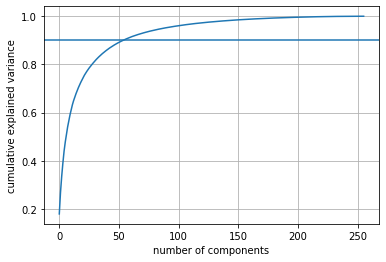

In [164]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_comb)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.9)
plt.grid()


In [165]:
pca=PCA(n_components=70).fit(X_comb)
a=np.cumsum(pca.explained_variance_ratio_)
a[-1]


0.9285789

In [ ]:
#Do a big loop 0->9 FINAL
#80 rows -- With PCA
import warnings
warnings.filterwarnings('ignore')

import time
#count=-1
cv=5
count=-1

lim_num_classes=10
# Choose hyperparams
#ite=[10]
#lmdb=[1e-5,1e-4]
ite = [10,100,1000]
lmdb=[1e-7,1e-5,1]
#4x3x10=120
rows = size(ite)*size(lmdb)*lim_num_classes
results = np.zeros((rows , 2+3+1+1)) # 3 (2 hyper+acc+prec+f1+time+testlabel)* number of ite
precision_scores = np.zeros(cv)
f1_scores = np.zeros(cv)
acc_scores=np.zeros(cv)

for j in range (0,lim_num_classes):
    currentLabel=eval('y'+str(j)) #this is label i -- have 
    print("-------------" + 'y' + str(j) +"-------------------" )
    #Split in train test
    X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X_comb,currentLabel,test_size=0.33)

    folds,length= Cross_Validation.partition(X_train,y_train,k=cv)

    print('Performing ' + str(cv) + '-Fold validation')
    col1no=-1

    for t in ite:
        col1no+=1
        col2no=-1
        for lm in lmdb:
                col2no+=1
                col3no=-1
                scores = np.zeros(cv)   #5 times cross val
                count+=1
                elaspedt=0
                notvalid=0
                for kth in range (cv):
                    xsubtest = folds[kth][:,:length] # Set ith fold to be test
                    ysubtest = folds[kth][:,length]
                    new_folds = np.row_stack(np.delete(folds,kth,0))
                    xsubtrain = new_folds[:,:length]
                    xfinsubtrain=pca.fit_transform(xsubtrain)
                    ysubtrain = new_folds[:,length]
                    col3no += 1
                    svc = KernelPegasos(T=t, lamb=lm)
            #xsubtrain, ysubtrain = X_train[id_train], y_train[id_train]
            #xsubtest, ysubtest = X_train[id_test], y_train[id_test]
                    start = time.time()     
                    svc.fit(xfinsubtrain, ysubtrain)
                    acc_scores[col3no] = svc.score(pca.transform(xsubtest), ysubtest)#vector 5 
                    end = time.time()
                    precision,f1score=metrics(svc.predict(pca.transform(xsubtest)),ysubtest)#precision f1score
                    precision_scores[col3no] = precision
                    f1_scores[col3no] = f1score
                    elaspedt+=(end-start)
                    if(precision==0):
                        notvalid+=1
            # get the mean -- get 1 value (cv estimate)
                #avg CV time 
                mean_acc_scores = acc_scores.mean()#will get nxm mean scores --> get
                mean_precision_scores=sum(precision_scores)/(cv-notvalid)
                mean_f1_scores= sum(f1_scores)/(cv-notvalid)

                results[count] = [j, t, lm, mean_acc,mean_precision,mean_f1, elaspedt] #3rd col put mean(scores)
                print('Print row ' + str(count) + ' For number = ' + str(j) + ' with T=' + str(t) 
                +' and lambda=' + str(lm) + ' avg_acc=' + str(mean_acc_scores)+ ' av_precision=' + str(mean_precision_scores)
                +' avg_f1_score=' + str(mean_f1_scores)+ ' time ' +str(elaspedt))

In [ ]:
best_params_pca = np.zeros((10,7))

df = pd.DataFrame(results, columns=["number", "ite", "lambda", "acc_score","prec_score", "f1_score", "time"])
df['number'] = df['number'].astype('int')
print(df)

In [ ]:
for i in range(0,10):
    check = df[df["number"] == i]
    index = np.argmax(check["f1_score"])
    best_values= check.take([index])
    best_params[i] = best_values

df_best_params_pca = pd.DataFrame(best_params_pca, columns=["number", "ite", "lambda", "acc_score", "prec_score", "f1_score" , "time",])
print(df_best_params_pca)

In [ ]:
df_best_params_pca.groupby(['ite', 'lambda']).size()
